<a href="https://colab.research.google.com/github/roscoekerby/google-colab/blob/main/ROSCODE_Autocrop_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original image size: (1080, 1080, 3)
Cropped image size: (600, 599, 3)


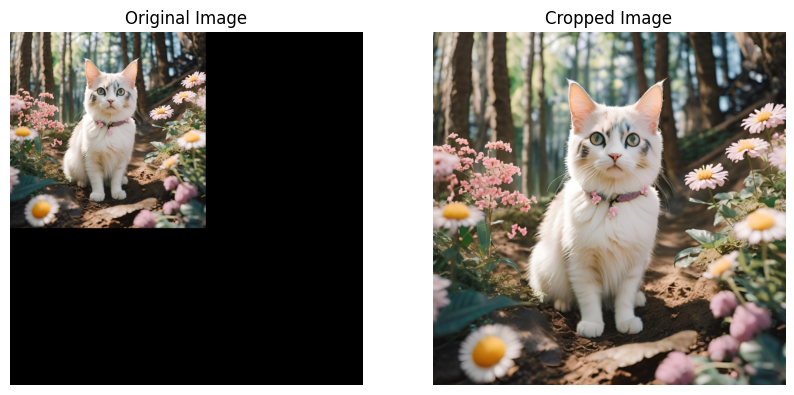

In [1]:
import cv2
import numpy as np
from collections import deque
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

def bfs_find_first_non_black_pixel(image, start_point):
    rows, cols = image.shape[:2]
    visited = np.zeros((rows, cols), dtype=bool)
    queue = deque([start_point])
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]

    while queue:
        x, y = queue.popleft()

        if not visited[x, y]:
            visited[x, y] = True

            if not np.all(image[x, y] == [0, 0, 0]):
                return (x, y)

            for dx, dy in directions:
                nx, ny = x + dx, y + dy
                if 0 <= nx < rows and 0 <= ny < cols and not visited[nx, ny]:
                    queue.append((nx, ny))

    return None

def crop_image(image, corners):
    x1 = min(corners, key=lambda x: x[0])[0]
    y1 = min(corners, key=lambda x: x[1])[1]
    x2 = max(corners, key=lambda x: x[0])[0]
    y2 = max(corners, key=lambda x: x[1])[1]
    return image[x1:x2 + 1, y1:y2 + 1]

def all_corners_non_black(image):
    rows, cols = image.shape[:2]
    corners = [(0, 0), (0, cols - 1), (rows - 1, 0), (rows - 1, cols - 1)]
    return all(not np.all(image[x, y] == [0, 0, 0]) for x, y in corners)

def remove_black_borders(image):
    rows, cols = image.shape[:2]

    # Remove black columns starting from the left
    for y in range(cols):
        if np.any(image[:, y] > 15):
            image = image[:, y:]
            break

    # Remove black columns starting from the right
    for y in range(cols - 1, -1, -1):
        if np.any(image[:, y] > 15):
            image = image[:, :y + 1]
            break

    # Remove black rows starting from the top
    for x in range(rows):
        if np.any(image[x, :] > 15):
            image = image[x:, :]
            break

    # Remove black rows starting from the bottom
    for x in range(rows - 1, -1, -1):
        if np.any(image[x, :] > 15):
            image = image[:x + 1, :]
            break

    return image

def remove_bottom_left_black_rows(image):
    while image.shape[0] > 0 and np.all(image[-1, 0] == [0, 0, 0]):
        image = image[:-1, :]
    return image

def remove_rows_with_rightmost_black_pixel(image):
    rows_to_keep = [i for i in range(image.shape[0]) if np.sum(image[i, -1]) >= 15]

    if rows_to_keep:
        image = image[rows_to_keep, :]
    else:
        image = np.zeros((0, image.shape[1], image.shape[2]), dtype=image.dtype)

    return image

def main(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if image is None:
        print("Error: Unable to load the image. Please check the path and file.")
        return

    print(f"Original image size: {image.shape}")

    previous_corners = None
    while not all_corners_non_black(image):
        # Find first non-black pixels from all four corners using BFS
        top_left = bfs_find_first_non_black_pixel(image, (0, 0))
        top_right = bfs_find_first_non_black_pixel(image, (0, image.shape[1] - 1))
        bottom_left = bfs_find_first_non_black_pixel(image, (image.shape[0] - 1, 0))
        bottom_right = bfs_find_first_non_black_pixel(image, (image.shape[0] - 1, image.shape[1] - 1))

        if None in [top_left, top_right, bottom_left, bottom_right]:
            print("Not enough non-black pixels found in the image.")
            break

        current_corners = [top_left, top_right, bottom_left, bottom_right]

        if current_corners == previous_corners:
            break

        previous_corners = current_corners

        # Crop the image based on the found coordinates
        image = crop_image(image, current_corners)

    # Ensure no black borders from the bottom left and top right
    image = remove_black_borders(image)

    # Remove rows from the bottom left where the initial left pixel is [0, 0, 0]
    image = remove_bottom_left_black_rows(image)

    # Remove rows with the furthest right pixel having combined values less than 15
    image = remove_rows_with_rightmost_black_pixel(image)

    print(f"Cropped image size: {image.shape}")

    # Save the final cropped image
    cv2.imwrite('cropped_image_final.jpg', image)

    # Display images using matplotlib
    original_image = cv2.imread(image_path)
    cropped_image = cv2.imread('cropped_image_final.jpg')

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Cropped Image')
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

if __name__ == "__main__":
    main('/content/Copy of kitten in border 1080p top left 600 x 600 kitten (1).png')


In [2]:
import cv2
import numpy as np
from collections import deque
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

def bfs_find_first_non_black_pixel(image, start_point):
    rows, cols = image.shape[:2]
    visited = np.zeros((rows, cols), dtype=bool)
    queue = deque([start_point])
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]

    while queue:
        x, y = queue.popleft()

        if not visited[x, y]:
            visited[x, y] = True

            if not np.all(image[x, y] == [0, 0, 0]):
                return (x, y)

            for dx, dy in directions:
                nx, ny = x + dx, y + dy
                if 0 <= nx < rows and 0 <= ny < cols and not visited[nx, ny]:
                    queue.append((nx, ny))

    return None

def crop_image(image, corners):
    x1 = min(corners, key=lambda x: x[0])[0]
    y1 = min(corners, key=lambda x: x[1])[1]
    x2 = max(corners, key=lambda x: x[0])[0]
    y2 = max(corners, key=lambda x: x[1])[1]
    return image[x1:x2 + 1, y1:y2 + 1]

def all_corners_non_black(image):
    rows, cols = image.shape[:2]
    corners = [(0, 0), (0, cols - 1), (rows - 1, 0), (rows - 1, cols - 1)]
    return all(not np.all(image[x, y] == [0, 0, 0]) for x, y in corners)

def remove_black_borders(image):
    rows, cols = image.shape[:2]

    # Remove black columns starting from the left
    for y in range(cols):
        if np.any(image[:, y] > 15):
            image = image[:, y:]
            break

    # Remove black columns starting from the right
    for y in range(cols - 1, -1, -1):
        if np.any(image[:, y] > 15):
            image = image[:, :y + 1]
            break

    # Remove black rows starting from the top
    for x in range(rows):
        if np.any(image[x, :] > 15):
            image = image[x:, :]
            break

    # Remove black rows starting from the bottom
    for x in range(rows - 1, -1, -1):
        if np.any(image[x, :] > 15):
            image = image[:x + 1, :]
            break

    return image

def remove_bottom_left_black_rows(image):
    while image.shape[0] > 0 and np.all(image[-1, 0] == [0, 0, 0]):
        image = image[:-1, :]
    return image

def remove_rows_with_rightmost_black_pixel(image):
    rows_to_keep = [i for i in range(image.shape[0]) if np.sum(image[i, -1]) >= 15]

    if rows_to_keep:
        image = image[rows_to_keep, :]
    else:
        image = np.zeros((0, image.shape[1], image.shape[2]), dtype=image.dtype)

    return image

def main(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if image is None:
        print("Error: Unable to load the image. Please check the path and file.")
        return

    print(f"Original image size: {image.shape}")

    previous_corners = None
    while not all_corners_non_black(image):
        # Find first non-black pixels from all four corners using BFS
        top_left = bfs_find_first_non_black_pixel(image, (0, 0))
        top_right = bfs_find_first_non_black_pixel(image, (0, image.shape[1] - 1))
        bottom_left = bfs_find_first_non_black_pixel(image, (image.shape[0] - 1, 0))
        bottom_right = bfs_find_first_non_black_pixel(image, (image.shape[0] - 1, image.shape[1] - 1))

        if None in [top_left, top_right, bottom_left, bottom_right]:
            print("Not enough non-black pixels found in the image.")
            break

        current_corners = [top_left, top_right, bottom_left, bottom_right]

        if current_corners == previous_corners:
            break

        previous_corners = current_corners

        # Crop the image based on the found coordinates
        image = crop_image(image, current_corners)

    # Ensure no black borders from the bottom left and top right
    image = remove_black_borders(image)

    # Remove rows from the bottom left where the initial left pixel is [0, 0, 0]
    image = remove_bottom_left_black_rows(image)

    # Remove rows with the furthest right pixel having combined values less than 15
    image = remove_rows_with_rightmost_black_pixel(image)

    print(f"Cropped image size: {image.shape}")

    # Save the final cropped image
    cv2.imwrite('cropped_image_final.jpg', image)

    # Display images using matplotlib
    original_image = cv2.imread(image_path)
    cropped_image = cv2.imread('cropped_image_final.jpg')

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Cropped Image')
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

if __name__ == "__main__":
    main('/content/Copy of kitten in border 1080p top left 600 x 600 kitten (2).png')


Original image size: (1080, 1080, 3)


IndexError: index 600 is out of bounds for axis 1 with size 600

Original image size: (1080, 1080, 3)
Cropped image size: (601, 600, 3)


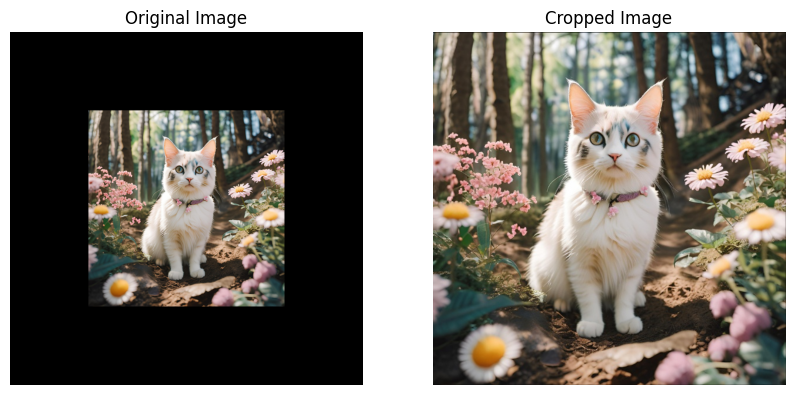

In [3]:
import cv2
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

def bfs_find_first_non_black_pixel(image, start_point):
    rows, cols = image.shape[:2]
    visited = np.zeros((rows, cols), dtype=bool)
    queue = deque([start_point])
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]

    while queue:
        x, y = queue.popleft()

        if not visited[x, y]:
            visited[x, y] = True

            if not np.all(image[x, y] == [0, 0, 0]):
                return (x, y)

            for dx, dy in directions:
                nx, ny = x + dx, y + dy
                if 0 <= nx < rows and 0 <= ny < cols and not visited[nx, ny]:
                    queue.append((nx, ny))

    return None

def crop_image(image, corners):
    x1 = min(corners, key=lambda x: x[0])[0]
    y1 = min(corners, key=lambda x: x[1])[1]
    x2 = max(corners, key=lambda x: x[0])[0]
    y2 = max(corners, key=lambda x: x[1])[1]
    return image[x1:x2 + 1, y1:y2 + 1]

def all_corners_non_black(image):
    rows, cols = image.shape[:2]
    corners = [(0, 0), (0, cols - 1), (rows - 1, 0), (rows - 1, cols - 1)]
    return all(not np.all(image[x, y] == [0, 0, 0]) for x, y in corners)

def remove_black_borders(image):
    rows, cols = image.shape[:2]

    # Remove black columns starting from the left
    for y in range(cols):
        if np.any(image[:, y] > 15):
            image = image[:, y:]
            break

    # Remove black columns starting from the right
    for y in range(image.shape[1] - 1, -1, -1):  # Update cols to image.shape[1]
        if np.any(image[:, y] > 15):
            image = image[:, :y + 1]
            break

    # Remove black rows starting from the top
    for x in range(rows):
        if np.any(image[x, :] > 15):
            image = image[x:, :]
            break

    # Remove black rows starting from the bottom
    for x in range(image.shape[0] - 1, -1, -1):  # Update rows to image.shape[0]
        if np.any(image[x, :] > 15):
            image = image[:x + 1, :]
            break

    return image

def remove_bottom_left_black_rows(image):
    while image.shape[0] > 0 and np.all(image[-1, 0] == [0, 0, 0]):
        image = image[:-1, :]
    return image

def remove_rows_with_rightmost_black_pixel(image):
    rows_to_keep = [i for i in range(image.shape[0]) if np.sum(image[i, -1]) >= 15]

    if rows_to_keep:
        image = image[rows_to_keep, :]
    else:
        image = np.zeros((0, image.shape[1], image.shape[2]), dtype=image.dtype)

    return image

def main(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if image is None:
        print("Error: Unable to load the image. Please check the path and file.")
        return

    print(f"Original image size: {image.shape}")

    previous_corners = None
    while not all_corners_non_black(image):
        # Find first non-black pixels from all four corners using BFS
        top_left = bfs_find_first_non_black_pixel(image, (0, 0))
        top_right = bfs_find_first_non_black_pixel(image, (0, image.shape[1] - 1))
        bottom_left = bfs_find_first_non_black_pixel(image, (image.shape[0] - 1, 0))
        bottom_right = bfs_find_first_non_black_pixel(image, (image.shape[0] - 1, image.shape[1] - 1))

        if None in [top_left, top_right, bottom_left, bottom_right]:
            print("Not enough non-black pixels found in the image.")
            break

        current_corners = [top_left, top_right, bottom_left, bottom_right]

        if current_corners == previous_corners:
            break

        previous_corners = current_corners

        # Crop the image based on the found coordinates
        image = crop_image(image, current_corners)

    # Ensure no black borders from the bottom left and top right
    image = remove_black_borders(image)

    # Remove rows from the bottom left where the initial left pixel is [0, 0, 0]
    image = remove_bottom_left_black_rows(image)

    # Remove rows with the furthest right pixel having combined values less than 15
    image = remove_rows_with_rightmost_black_pixel(image)

    print(f"Cropped image size: {image.shape}")

    # Save the final cropped image
    cv2.imwrite('cropped_image_final.jpg', image)

    # Display images using matplotlib
    original_image = cv2.imread(image_path)
    cropped_image = cv2.imread('cropped_image_final.jpg')

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Cropped Image')
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

if __name__ == "__main__":
    main('/content/Copy of kitten in border 1080p top left 600 x 600 kitten (2).png')


Original image size: (1080, 1080, 3)
Cropped image size: (490, 601, 3)


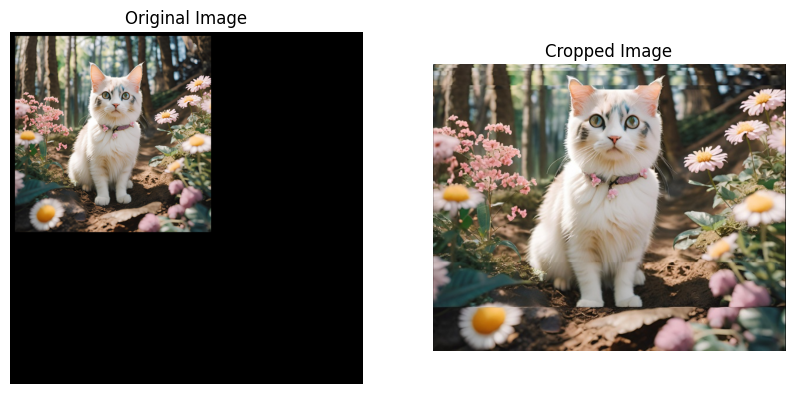

In [4]:
import cv2
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

def bfs_find_first_non_black_pixel(image, start_point):
    rows, cols = image.shape[:2]
    visited = np.zeros((rows, cols), dtype=bool)
    queue = deque([start_point])
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]

    while queue:
        x, y = queue.popleft()

        if not visited[x, y]:
            visited[x, y] = True

            if not np.all(image[x, y] == [0, 0, 0]):
                return (x, y)

            for dx, dy in directions:
                nx, ny = x + dx, y + dy
                if 0 <= nx < rows and 0 <= ny < cols and not visited[nx, ny]:
                    queue.append((nx, ny))

    return None

def crop_image(image, corners):
    x1 = min(corners, key=lambda x: x[0])[0]
    y1 = min(corners, key=lambda x: x[1])[1]
    x2 = max(corners, key=lambda x: x[0])[0]
    y2 = max(corners, key=lambda x: x[1])[1]
    return image[x1:x2 + 1, y1:y2 + 1]

def all_corners_non_black(image):
    rows, cols = image.shape[:2]
    corners = [(0, 0), (0, cols - 1), (rows - 1, 0), (rows - 1, cols - 1)]
    return all(not np.all(image[x, y] == [0, 0, 0]) for x, y in corners)

def remove_black_borders(image):
    rows, cols = image.shape[:2]

    # Remove black columns starting from the left
    for y in range(cols):
        if np.any(image[:, y] > 15):
            image = image[:, y:]
            break

    # Remove black columns starting from the right
    for y in range(image.shape[1] - 1, -1, -1):  # Update cols to image.shape[1]
        if np.any(image[:, y] > 15):
            image = image[:, :y + 1]
            break

    # Remove black rows starting from the top
    for x in range(rows):
        if np.any(image[x, :] > 15):
            image = image[x:, :]
            break

    # Remove black rows starting from the bottom
    for x in range(image.shape[0] - 1, -1, -1):  # Update rows to image.shape[0]
        if np.any(image[x, :] > 15):
            image = image[:x + 1, :]
            break

    return image

def remove_bottom_left_black_rows(image):
    while image.shape[0] > 0 and np.all(image[-1, 0] == [0, 0, 0]):
        image = image[:-1, :]
    return image

def remove_rows_with_rightmost_black_pixel(image):
    rows_to_keep = [i for i in range(image.shape[0]) if np.sum(image[i, -1]) >= 15]

    if rows_to_keep:
        image = image[rows_to_keep, :]
    else:
        image = np.zeros((0, image.shape[1], image.shape[2]), dtype=image.dtype)

    return image

def main(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if image is None:
        print("Error: Unable to load the image. Please check the path and file.")
        return

    print(f"Original image size: {image.shape}")

    previous_corners = None
    while not all_corners_non_black(image):
        # Find first non-black pixels from all four corners using BFS
        top_left = bfs_find_first_non_black_pixel(image, (0, 0))
        top_right = bfs_find_first_non_black_pixel(image, (0, image.shape[1] - 1))
        bottom_left = bfs_find_first_non_black_pixel(image, (image.shape[0] - 1, 0))
        bottom_right = bfs_find_first_non_black_pixel(image, (image.shape[0] - 1, image.shape[1] - 1))

        if None in [top_left, top_right, bottom_left, bottom_right]:
            print("Not enough non-black pixels found in the image.")
            break

        current_corners = [top_left, top_right, bottom_left, bottom_right]

        if current_corners == previous_corners:
            break

        previous_corners = current_corners

        # Crop the image based on the found coordinates
        image = crop_image(image, current_corners)

    # Ensure no black borders from the bottom left and top right
    image = remove_black_borders(image)

    # Remove rows from the bottom left where the initial left pixel is [0, 0, 0]
    image = remove_bottom_left_black_rows(image)

    # Remove rows with the furthest right pixel having combined values less than 15
    image = remove_rows_with_rightmost_black_pixel(image)

    print(f"Cropped image size: {image.shape}")

    # Save the final cropped image
    cv2.imwrite('cropped_image_final.jpg', image)

    # Display images using matplotlib
    original_image = cv2.imread(image_path)
    cropped_image = cv2.imread('cropped_image_final.jpg')

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Cropped Image')
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

if __name__ == "__main__":
    main('/content/Copy of kitten in border 1080p top left 600 x 600 kitten.png')


Original image size: (1080, 1080, 3)
Cropped image size: (490, 601, 3)


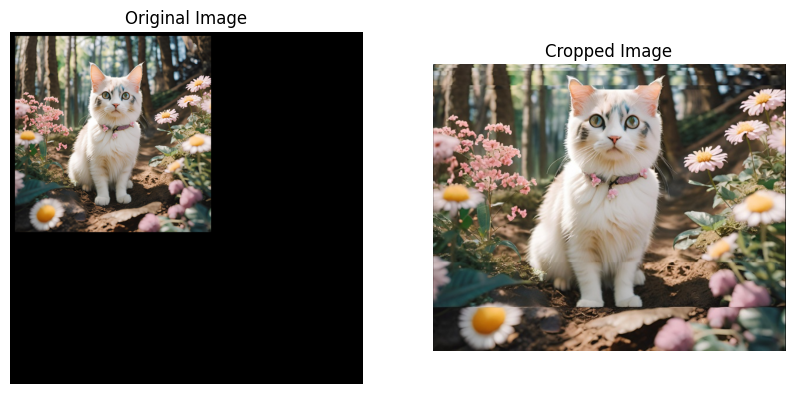

In [5]:
import cv2
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

def bfs_find_first_non_black_pixel(image, start_point):
    rows, cols = image.shape[:2]
    visited = np.zeros((rows, cols), dtype=bool)
    queue = deque([start_point])
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]

    while queue:
        x, y = queue.popleft()

        if not visited[x, y]:
            visited[x, y] = True

            if not np.all(image[x, y] == [0, 0, 0]):
                return (x, y)

            for dx, dy in directions:
                nx, ny = x + dx, y + dy
                if 0 <= nx < rows and 0 <= ny < cols and not visited[nx, ny]:
                    queue.append((nx, ny))

    return None

def crop_image(image, corners):
    x1 = min(corners, key=lambda x: x[0])[0]
    y1 = min(corners, key=lambda x: x[1])[1]
    x2 = max(corners, key=lambda x: x[0])[0]
    y2 = max(corners, key=lambda x: x[1])[1]
    return image[x1:x2 + 1, y1:y2 + 1]

def all_corners_non_black(image):
    rows, cols = image.shape[:2]
    corners = [(0, 0), (0, cols - 1), (rows - 1, 0), (rows - 1, cols - 1)]
    return all(not np.all(image[x, y] == [0, 0, 0]) for x, y in corners)

def remove_black_borders(image):
    rows, cols = image.shape[:2]

    # Remove black columns starting from the left
    for y in range(cols):
        if np.any(image[:, y] > 15):
            image = image[:, y:]
            break

    # Remove black columns starting from the right
    for y in range(image.shape[1] - 1, -1, -1):
        if np.any(image[:, y] > 15):
            image = image[:, :y + 1]
            break

    # Remove black rows starting from the top
    for x in range(rows):
        if np.any(image[x, :] > 15):
            image = image[x:, :]
            break

    # Remove black rows starting from the bottom
    for x in range(image.shape[0] - 1, -1, -1):
        if np.any(image[x, :] > 15):
            image = image[:x + 1, :]
            break

    return image

def remove_bottom_left_black_rows(image):
    while image.shape[0] > 0 and np.all(image[-1, 0] == [0, 0, 0]):
        image = image[:-1, :]
    return image

def remove_rows_with_rightmost_black_pixel(image):
    rows_to_keep = [i for i in range(image.shape[0]) if np.sum(image[i, -1]) >= 15]

    if rows_to_keep:
        image = image[rows_to_keep, :]
    else:
        image = np.zeros((0, image.shape[1], image.shape[2]), dtype=image.dtype)

    return image

def main(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if image is None:
        print("Error: Unable to load the image. Please check the path and file.")
        return

    print(f"Original image size: {image.shape}")

    previous_corners = None
    while not all_corners_non_black(image):
        # Find first non-black pixels from all four corners using BFS
        top_left = bfs_find_first_non_black_pixel(image, (0, 0))
        top_right = bfs_find_first_non_black_pixel(image, (0, image.shape[1] - 1))
        bottom_left = bfs_find_first_non_black_pixel(image, (image.shape[0] - 1, 0))
        bottom_right = bfs_find_first_non_black_pixel(image, (image.shape[0] - 1, image.shape[1] - 1))

        if None in [top_left, top_right, bottom_left, bottom_right]:
            print("Not enough non-black pixels found in the image.")
            break

        current_corners = [top_left, top_right, bottom_left, bottom_right]

        if current_corners == previous_corners:
            break

        previous_corners = current_corners

        # Crop the image based on the found coordinates
        image = crop_image(image, current_corners)

    # Ensure no black borders from the bottom left and top right
    image = remove_black_borders(image)

    # Remove rows from the bottom left where the initial left pixel is [0, 0, 0]
    image = remove_bottom_left_black_rows(image)

    # Remove rows with the furthest right pixel having combined values less than 15
    image = remove_rows_with_rightmost_black_pixel(image)

    print(f"Cropped image size: {image.shape}")

    # Save the final cropped image
    cv2.imwrite('cropped_image_final.jpg', image)

    # Display images using matplotlib
    original_image = cv2.imread(image_path)
    cropped_image = cv2.imread('cropped_image_final.jpg')

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Cropped Image')
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

if __name__ == "__main__":
    main('/content/Copy of kitten in border 1080p top left 600 x 600 kitten.png')


Original image size: (1080, 1080, 3)
Cropped image size: (490, 601, 3)


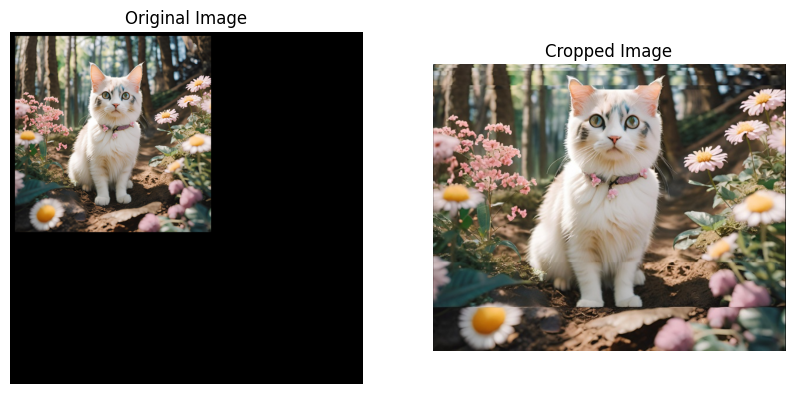

In [6]:
import cv2
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

def bfs_find_first_non_black_pixel(image, start_point):
    rows, cols = image.shape[:2]
    visited = np.zeros((rows, cols), dtype=bool)
    queue = deque([start_point])
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]

    while queue:
        x, y = queue.popleft()

        if not visited[x, y]:
            visited[x, y] = True

            if not np.all(image[x, y] == [0, 0, 0]):
                return (x, y)

            for dx, dy in directions:
                nx, ny = x + dx, y + dy
                if 0 <= nx < rows and 0 <= ny < cols and not visited[nx, ny]:
                    queue.append((nx, ny))

    return None

def crop_image(image, corners):
    x1 = min(corners, key=lambda x: x[0])[0]
    y1 = min(corners, key=lambda x: x[1])[1]
    x2 = max(corners, key=lambda x: x[0])[0]
    y2 = max(corners, key=lambda x: x[1])[1]
    return image[x1:x2 + 1, y1:y2 + 1]

def all_corners_non_black(image):
    rows, cols = image.shape[:2]
    corners = [(0, 0), (0, cols - 1), (rows - 1, 0), (rows - 1, cols - 1)]
    return all(not np.all(image[x, y] == [0, 0, 0]) for x, y in corners)

def remove_black_borders(image):
    rows, cols = image.shape[:2]

    # Remove black columns starting from the left
    for y in range(cols):
        if np.any(image[:, y] > 15):
            image = image[:, y:]
            break

    # Remove black columns starting from the right
    for y in range(image.shape[1] - 1, -1, -1):
        if np.any(image[:, y] > 15):
            image = image[:, :y + 1]
            break

    # Remove black rows starting from the top
    for x in range(rows):
        if np.any(image[x, :] > 15):
            image = image[x:, :]
            break

    # Remove black rows starting from the bottom
    for x in range(image.shape[0] - 1, -1, -1):
        if np.any(image[x, :] > 15):
            image = image[:x + 1, :]
            break

    return image

def remove_bottom_left_black_rows(image):
    while image.shape[0] > 0 and np.all(image[-1, 0] == [0, 0, 0]):
        image = image[:-1, :]
    return image

def remove_rows_with_rightmost_black_pixel(image):
    rows_to_keep = [i for i in range(image.shape[0]) if np.sum(image[i, -1]) >= 15]

    if rows_to_keep:
        image = image[rows_to_keep, :]
    else:
        image = np.zeros((0, image.shape[1], image.shape[2]), dtype=image.dtype)

    return image

def main(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if image is None:
        print("Error: Unable to load the image. Please check the path and file.")
        return

    print(f"Original image size: {image.shape}")

    previous_corners = None
    while not all_corners_non_black(image):
        # Find first non-black pixels from all four corners using BFS
        top_left = bfs_find_first_non_black_pixel(image, (0, 0))
        top_right = bfs_find_first_non_black_pixel(image, (0, image.shape[1] - 1))
        bottom_left = bfs_find_first_non_black_pixel(image, (image.shape[0] - 1, 0))
        bottom_right = bfs_find_first_non_black_pixel(image, (image.shape[0] - 1, image.shape[1] - 1))

        if None in [top_left, top_right, bottom_left, bottom_right]:
            print("Not enough non-black pixels found in the image.")
            break

        current_corners = [top_left, top_right, bottom_left, bottom_right]

        if current_corners == previous_corners:
            break

        previous_corners = current_corners

        # Crop the image based on the found coordinates
        image = crop_image(image, current_corners)

    # Ensure no black borders from the bottom left and top right
    image = remove_black_borders(image)

    # Remove rows from the bottom left where the initial left pixel is [0, 0, 0]
    image = remove_bottom_left_black_rows(image)

    # Remove rows with the furthest right pixel having combined values less than 15
    image = remove_rows_with_rightmost_black_pixel(image)

    print(f"Cropped image size: {image.shape}")

    # Save the final cropped image
    cv2.imwrite('cropped_image_final.jpg', image)

    # Display images using matplotlib
    original_image = cv2.imread(image_path)
    cropped_image = cv2.imread('cropped_image_final.jpg')

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Cropped Image')
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

if __name__ == "__main__":
    main('/content/Copy of kitten in border 1080p top left 600 x 600 kitten.png')


Original image size: (1080, 1080, 3)
Cropped image size: (601, 601, 3)


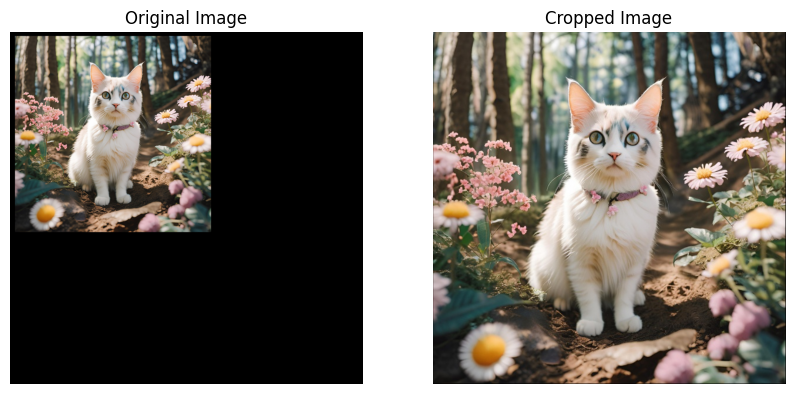

cropped_image_final.jpg


In [7]:
import cv2
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

def bfs_find_first_non_black_pixel(image, start_point):
    rows, cols = image.shape[:2]
    visited = np.zeros((rows, cols), dtype=bool)
    queue = deque([start_point])
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]

    while queue:
        x, y = queue.popleft()

        if not visited[x, y]:
            visited[x, y] = True

            if not np.all(image[x, y] == [0, 0, 0]):
                return (x, y)

            for dx, dy in directions:
                nx, ny = x + dx, y + dy
                if 0 <= nx < rows and 0 <= ny < cols and not visited[nx, ny]:
                    queue.append((nx, ny))

    return None

def crop_image(image, corners):
    x1 = min(corners, key=lambda x: x[0])[0]
    y1 = min(corners, key=lambda x: x[1])[1]
    x2 = max(corners, key=lambda x: x[0])[0]
    y2 = max(corners, key=lambda x: x[1])[1]
    return image[x1:x2 + 1, y1:y2 + 1]

def all_corners_non_black(image):
    rows, cols = image.shape[:2]
    corners = [(0, 0), (0, cols - 1), (rows - 1, 0), (rows - 1, cols - 1)]
    return all(not np.all(image[x, y] == [0, 0, 0]) for x, y in corners)

def remove_black_borders(image):
    rows, cols = image.shape[:2]

    # Remove black columns starting from the left
    for y in range(cols):
        if np.any(image[:, y] != [0, 0, 0]):
            image = image[:, y:]
            break

    # Remove black columns starting from the right
    for y in range(image.shape[1] - 1, -1, -1):
        if np.any(image[:, y] != [0, 0, 0]):
            image = image[:, :y + 1]
            break

    # Remove black rows starting from the top
    for x in range(rows):
        if np.any(image[x, :] != [0, 0, 0]):
            image = image[x:, :]
            break

    # Remove black rows starting from the bottom
    for x in range(image.shape[0] - 1, -1, -1):
        if np.any(image[x, :] != [0, 0, 0]):
            image = image[:x + 1, :]
            break

    return image

def main(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if image is None:
        print("Error: Unable to load the image. Please check the path and file.")
        return

    print(f"Original image size: {image.shape}")

    previous_corners = None
    while not all_corners_non_black(image):
        # Find first non-black pixels from all four corners using BFS
        top_left = bfs_find_first_non_black_pixel(image, (0, 0))
        top_right = bfs_find_first_non_black_pixel(image, (0, image.shape[1] - 1))
        bottom_left = bfs_find_first_non_black_pixel(image, (image.shape[0] - 1, 0))
        bottom_right = bfs_find_first_non_black_pixel(image, (image.shape[0] - 1, image.shape[1] - 1))

        if None in [top_left, top_right, bottom_left, bottom_right]:
            print("Not enough non-black pixels found in the image.")
            break

        current_corners = [top_left, top_right, bottom_left, bottom_right]

        if current_corners == previous_corners:
            break

        previous_corners = current_corners

        # Crop the image based on the found coordinates
        image = crop_image(image, current_corners)

    # Ensure no black borders from the bottom left and top right
    image = remove_black_borders(image)

    print(f"Cropped image size: {image.shape}")

    # Save the final cropped image
    cropped_image_path = 'cropped_image_final.jpg'
    cv2.imwrite(cropped_image_path, image)

    # Display images using matplotlib
    original_image = cv2.imread(image_path)
    cropped_image = cv2.imread(cropped_image_path)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Cropped Image')
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

    return cropped_image_path

cropped_image_path = main('/content/Copy of kitten in border 1080p top left 600 x 600 kitten.png')
print(cropped_image_path)


Original image size: (1080, 1080, 3)
Cropped image size: (600, 599, 3)


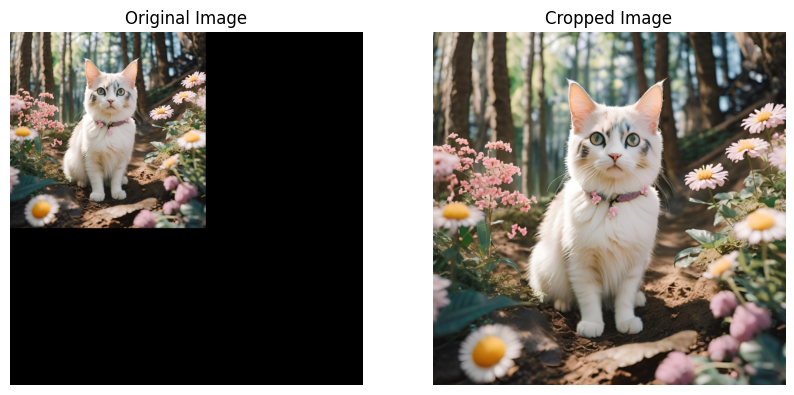

cropped_image_final.jpg


In [8]:
import cv2
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

def bfs_find_first_non_black_pixel(image, start_point):
    rows, cols = image.shape[:2]
    visited = np.zeros((rows, cols), dtype=bool)
    queue = deque([start_point])
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]

    while queue:
        x, y = queue.popleft()

        if not visited[x, y]:
            visited[x, y] = True

            if not np.all(image[x, y] == [0, 0, 0]):
                return (x, y)

            for dx, dy in directions:
                nx, ny = x + dx, y + dy
                if 0 <= nx < rows and 0 <= ny < cols and not visited[nx, ny]:
                    queue.append((nx, ny))

    return None

def crop_image(image, corners):
    x1 = min(corners, key=lambda x: x[0])[0]
    y1 = min(corners, key=lambda x: x[1])[1]
    x2 = max(corners, key=lambda x: x[0])[0]
    y2 = max(corners, key=lambda x: x[1])[1]
    return image[x1:x2 + 1, y1:y2 + 1]

def all_corners_non_black(image):
    rows, cols = image.shape[:2]
    corners = [(0, 0), (0, cols - 1), (rows - 1, 0), (rows - 1, cols - 1)]
    return all(not np.all(image[x, y] == [0, 0, 0]) for x, y in corners)

def remove_black_borders(image):
    rows, cols = image.shape[:2]

    # Remove black columns starting from the left
    for y in range(cols):
        if np.any(image[:, y] != [0, 0, 0]):
            image = image[:, y:]
            break

    # Remove black columns starting from the right
    for y in range(image.shape[1] - 1, -1, -1):
        if np.any(image[:, y] != [0, 0, 0]):
            image = image[:, :y + 1]
            break

    # Remove black rows starting from the top
    for x in range(rows):
        if np.any(image[x, :] != [0, 0, 0]):
            image = image[x:, :]
            break

    # Remove black rows starting from the bottom
    for x in range(image.shape[0] - 1, -1, -1):
        if np.any(image[x, :] != [0, 0, 0]):
            image = image[:x + 1, :]
            break

    return image

def main(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if image is None:
        print("Error: Unable to load the image. Please check the path and file.")
        return

    print(f"Original image size: {image.shape}")

    previous_corners = None
    while not all_corners_non_black(image):
        # Find first non-black pixels from all four corners using BFS
        top_left = bfs_find_first_non_black_pixel(image, (0, 0))
        top_right = bfs_find_first_non_black_pixel(image, (0, image.shape[1] - 1))
        bottom_left = bfs_find_first_non_black_pixel(image, (image.shape[0] - 1, 0))
        bottom_right = bfs_find_first_non_black_pixel(image, (image.shape[0] - 1, image.shape[1] - 1))

        if None in [top_left, top_right, bottom_left, bottom_right]:
            print("Not enough non-black pixels found in the image.")
            break

        current_corners = [top_left, top_right, bottom_left, bottom_right]

        if current_corners == previous_corners:
            break

        previous_corners = current_corners

        # Crop the image based on the found coordinates
        image = crop_image(image, current_corners)

    # Ensure no black borders from the bottom left and top right
    image = remove_black_borders(image)

    print(f"Cropped image size: {image.shape}")

    # Save the final cropped image
    cropped_image_path = 'cropped_image_final.jpg'
    cv2.imwrite(cropped_image_path, image)

    # Display images using matplotlib
    original_image = cv2.imread(image_path)
    cropped_image = cv2.imread(cropped_image_path)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Cropped Image')
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

    return cropped_image_path

cropped_image_path = main('/content/Copy of kitten in border 1080p top left 600 x 600 kitten (1).png')
print(cropped_image_path)


Original image size: (1080, 1080, 3)
Cropped image size: (601, 601, 3)


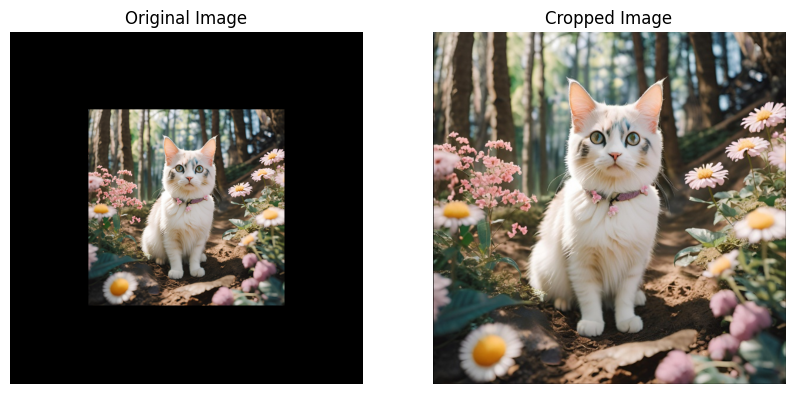

cropped_image_final.jpg


In [9]:
import cv2
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

def bfs_find_first_non_black_pixel(image, start_point):
    rows, cols = image.shape[:2]
    visited = np.zeros((rows, cols), dtype=bool)
    queue = deque([start_point])
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]

    while queue:
        x, y = queue.popleft()

        if not visited[x, y]:
            visited[x, y] = True

            if not np.all(image[x, y] == [0, 0, 0]):
                return (x, y)

            for dx, dy in directions:
                nx, ny = x + dx, y + dy
                if 0 <= nx < rows and 0 <= ny < cols and not visited[nx, ny]:
                    queue.append((nx, ny))

    return None

def crop_image(image, corners):
    x1 = min(corners, key=lambda x: x[0])[0]
    y1 = min(corners, key=lambda x: x[1])[1]
    x2 = max(corners, key=lambda x: x[0])[0]
    y2 = max(corners, key=lambda x: x[1])[1]
    return image[x1:x2 + 1, y1:y2 + 1]

def all_corners_non_black(image):
    rows, cols = image.shape[:2]
    corners = [(0, 0), (0, cols - 1), (rows - 1, 0), (rows - 1, cols - 1)]
    return all(not np.all(image[x, y] == [0, 0, 0]) for x, y in corners)

def remove_black_borders(image):
    rows, cols = image.shape[:2]

    # Remove black columns starting from the left
    for y in range(cols):
        if np.any(image[:, y] != [0, 0, 0]):
            image = image[:, y:]
            break

    # Remove black columns starting from the right
    for y in range(image.shape[1] - 1, -1, -1):
        if np.any(image[:, y] != [0, 0, 0]):
            image = image[:, :y + 1]
            break

    # Remove black rows starting from the top
    for x in range(rows):
        if np.any(image[x, :] != [0, 0, 0]):
            image = image[x:, :]
            break

    # Remove black rows starting from the bottom
    for x in range(image.shape[0] - 1, -1, -1):
        if np.any(image[x, :] != [0, 0, 0]):
            image = image[:x + 1, :]
            break

    return image

def main(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if image is None:
        print("Error: Unable to load the image. Please check the path and file.")
        return

    print(f"Original image size: {image.shape}")

    previous_corners = None
    while not all_corners_non_black(image):
        # Find first non-black pixels from all four corners using BFS
        top_left = bfs_find_first_non_black_pixel(image, (0, 0))
        top_right = bfs_find_first_non_black_pixel(image, (0, image.shape[1] - 1))
        bottom_left = bfs_find_first_non_black_pixel(image, (image.shape[0] - 1, 0))
        bottom_right = bfs_find_first_non_black_pixel(image, (image.shape[0] - 1, image.shape[1] - 1))

        if None in [top_left, top_right, bottom_left, bottom_right]:
            print("Not enough non-black pixels found in the image.")
            break

        current_corners = [top_left, top_right, bottom_left, bottom_right]

        if current_corners == previous_corners:
            break

        previous_corners = current_corners

        # Crop the image based on the found coordinates
        image = crop_image(image, current_corners)

    # Ensure no black borders from the bottom left and top right
    image = remove_black_borders(image)

    print(f"Cropped image size: {image.shape}")

    # Save the final cropped image
    cropped_image_path = 'cropped_image_final.jpg'
    cv2.imwrite(cropped_image_path, image)

    # Display images using matplotlib
    original_image = cv2.imread(image_path)
    cropped_image = cv2.imread(cropped_image_path)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Cropped Image')
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

    return cropped_image_path

cropped_image_path = main('/content/Copy of kitten in border 1080p top left 600 x 600 kitten (2).png')
print(cropped_image_path)
